<a href="https://colab.research.google.com/github/JPrakashKumar/Machine-learning_Projects/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images

In [3]:
from bing_image_downloader import downloader

In [ ]:
  downloader.download("pretty sunflower", limit=30, output_dir='images', adult_filter_off= True)

In [ ]:
  downloader.download("cricket-ball", limit=30, output_dir='images', adult_filter_off= True)

In [ ]:
  downloader.download("ice cream cone", limit=30, output_dir='images', adult_filter_off= True)

In [7]:
# -----------PREPROCESSING-------------
#  1. Resize
#  2. Flatten

import os                           # To play with lot of folders
import matplotlib.pyplot as plt     # To display the images
import numpy as np                  # for numerical computing
from skimage.io import imread       # for reading images
from skimage.transform import resize # set the images to a specific size

target = [] # for output
images = [] # for input
flat_data = [] # for flatten image

DATADIR = '/content/images'
CATEGORIES = ['pretty sunflower', 'cricket-ball', 'ice cream cone']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # level encoding the values
  path = os.path.join(DATADIR,category)  #create path to use all the 
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # print(img_array.shape)
    # plt.imshow(img_array) # use 'break' statement to show single item from the array of items
    img_resized = resize(img_array,(150,150,3)) # Normalizes the alue from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
    

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
len(flat_data[0])

67500

In [10]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

<BarContainer object of 3 artists>

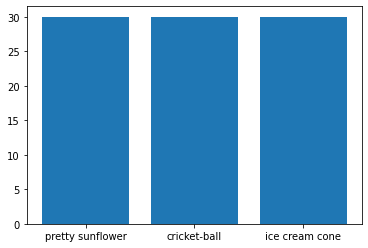

In [11]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [30]:
# Split data into Training & Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=55)

In [26]:
# here we choose specific selection model GridSearchCv to use of proper parameter in support vector.

from sklearn.model_selection import GridSearchCV
from sklearn import svm  # support vector machine

param_grid = [
              {'C':[10,100,1000],'kernel':['linear']},
              {'C':[10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True) # Go for all probable outputs
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [10, 100, 1000], 'kernel': ['linear']},
                         {'C': [10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf', 'poly']}])

In [31]:
y_pred = clf.predict(x_test) # predicted output
y_pred

array([0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 1])

In [32]:
y_test

array([0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2,
       0, 2, 0, 2, 1])

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_pred,y_test)

0.9629629629629629

In [34]:
confusion_matrix(y_pred,y_test)

array([[12,  0,  0],
       [ 0,  3,  0],
       [ 0,  1, 11]])

In [35]:
# Save the model using Pickle library

import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [36]:
# load the model which you build

model = pickle.load(open('img_model.p','rb'))

Enter your URL/content/test-images/flowers.jpeg
Predicted Output: pretty sunflower


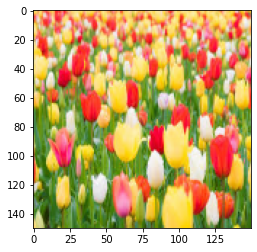

In [45]:
# Testing new images to model prediction

flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
# print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Output: {y_out}')


In [46]:
from math import floor
q = model.predict_proba(flat_data)
for index, item in enumerate(CATEGORIES):
  print(f'{item} : {floor(q[0][index]*100)}')

pretty sunflower : 54
cricket-ball : 18
ice cream cone : 27


In [20]:
!mkdir test-images